1.jpg: 1 leaves
2.jpg: 3 leaves
3.jpg: 4 leaves
4.jpg: 6 leaves
5.jpg: 8 leaves
6.jpg: 4 leaves
7.jpg: 3 leaves
8.jpg: 2 leaves
9.jpg: 23 leaves
10.jpg: 17 leaves
11.jpg: 8 leaves
12.jpg: 30 leaves
13.jpg: 3 leaves
14.jpg: 3 leaves

Complete Analysis Results


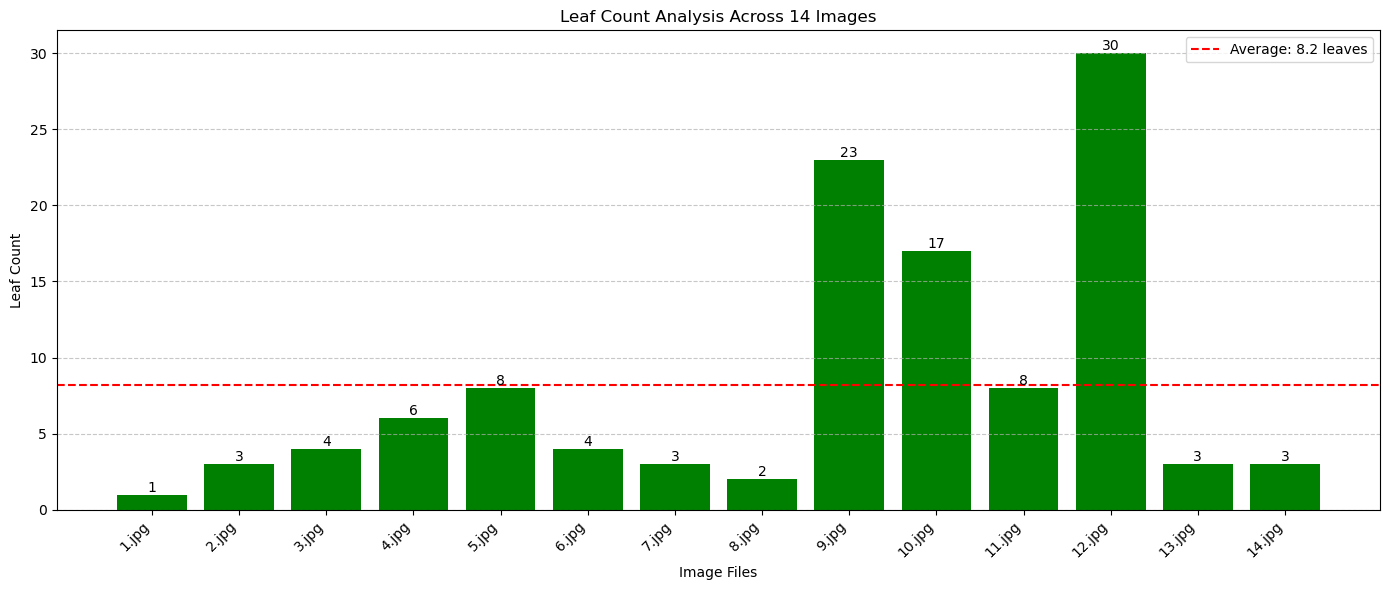

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Initialize lists to store results
image_names = []
leaf_counts = []

# Process each image from 1.jpg to 14.jpg
for i in range(1, 15):
    filename = f"{i}.jpg"
    
    # Check if file exists
    if not os.path.exists(filename):
        print(f"Warning: {filename} not found. Skipping...")
        continue
    
    # Load and process image
    image = cv2.imread(filename)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Green color range
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([90, 255, 255])
    
    # Create mask
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Noise removal
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter small contours
    min_leaf_size = 100
    leaf_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_size]
    
    # Store results
    leaf_count = len(leaf_contours)
    image_names.append(filename)
    leaf_counts.append(leaf_count)
    print(f"{filename}: {leaf_count} leaves")

# Create visualization
plt.figure(figsize=(14, 6))

# Bar chart
bars = plt.bar(image_names, leaf_counts, color='green')
plt.xlabel('Image Files')
plt.ylabel('Leaf Count')
plt.title('Leaf Count Analysis Across 14 Images')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate and display average
avg_count = np.mean(leaf_counts)
plt.axhline(y=avg_count, color='r', linestyle='--', 
            label=f'Average: {avg_count:.1f} leaves')
plt.legend()

plt.tight_layout()

# Save and show results
plt.savefig('leaf_count_analysis.png', dpi=300, bbox_inches='tight')
print(f"\nComplete Analysis Results")
plt.show()